In [1]:
from scpviz import pAnnData as pAnnData
from scpviz import plotting as scplt
from scpviz import utils as scutils

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks')

In [2]:
obs_columns = ['Sample','cellline','condition']

pdata = pAnnData.import_data(source_type='pd', prot_file = 'pd_prot.txt', obs_columns=obs_columns)


🧭 [USER] Importing data of type [pd]
--------------------------
Starting import [Proteome Discoverer]

Source file: pd_prot.txt / None
Number of files: 12
Proteins: 4988

ℹ️ 25 proteins with missing gene names.
     🌐 [API] Querying UniProt for batch 1/1 (25 proteins) [fields: accession, gene_primary]
     ✅ Retrieved UniProt metadata for 25 entries.
     ✅ [OK] Recovered 24 gene name(s) from UniProt. Genes found:
         TUFM, HDLBP, AMPD2, MYG1, HSD17B11, PCM1, NEFH, OXA1L, TRMT5, SLC4A1AP...
     ⚠️ [WARN] 1 gene name(s) still missing. Assigned as 'UNKNOWN_<accession>' for:
         Q6ZSR9
💡 Tip: You can update these using `pdata.update_identifier_maps({'GENE': 'ACCESSION'}, on='protein', direction='reverse', overwrite=True)`
          🔄 [UPDATE] Updating summary [recompute]: Recomputed metrics and refreshed `.summary` from `.obs`.
     ℹ️ [INFO] Using global q-values for 'prot' significance annotation.

     ✅ [OK] pAnnData object is valid.
     ✅ [OK] Import complete. Use `print(

In [4]:
pdata

pAnnData object

Summary:
  Groups: Sample, cellline, condition, mbr_count
  Avg proteins/sample: 4720.3
  Avg protein quant: 0.95
  Samples < 50% quant: 0

Protein (shape: 12 files × 4988 proteins)
  obs:    Sample, cellline, condition, protein_quant, protein_count...
  var:    Protein FDR Confidence: Combined, Master, Accession, Description, Global_Q_value...
  obsm:   —
  layers: X_raw, X_mbr

Peptide: None

RS:
  None

STRING Enrichment:
  —

In [3]:
pdata.prot.var

,Protein FDR Confidence: Combined,Master,Accession,Description,Global_Q_value,Sum PEP Score,Coverage [%],# Peptides,# PSMs,# Unique Peptides,...,Found In: F2,Found In: F6,Found In: F10,Found In: F3,Found In: F7,Found In: F11,Found In: F1,Found In: F5,Found In: F9,Significant In: Global
P07437,High,IsMasterProtein,P07437,Tubulin beta chain OS=Homo sapiens OX=9606 GN=...,0.000,212.455,73,23,835,5,...,True,True,True,True,True,True,True,True,True,True
P78527,High,IsMasterProtein,P78527,DNA-dependent protein kinase catalytic subunit...,0.000,527.798,35,130,1011,130,...,True,True,True,True,True,True,True,True,True,True
Q13813,High,IsMasterProtein,Q13813,"Spectrin alpha chain, non-erythrocytic 1 OS=Ho...",0.000,470.411,43,93,710,2,...,True,True,True,True,True,True,True,True,True,True
Q13813-3,High,IsMasterProtein,Q13813-3,"Isoform 3 of Spectrin alpha chain, non-erythro...",0.000,469.015,43,92,710,1,...,True,True,True,True,True,True,True,True,True,True
P68371,High,IsMasterProtein,P68371,Tubulin beta-4B chain OS=Homo sapiens OX=9606 ...,0.000,185.507,69,21,718,1,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9H1K6,Medium,IsMasterProtein,Q9H1K6,Talin rod domain-containing protein 1 OS=Homo ...,0.024,1.984,3,1,1,1,...,True,True,True,True,True,True,True,True,True,False
O14646,High,IsMasterProtein,O14646,Chromodomain-helicase-DNA-binding protein 1 OS...,0.000,6.487,1,2,15,1,...,True,True,True,True,True,True,True,True,True,True
P05186,Medium,IsMasterProtein,P05186,"Alkaline phosphatase, tissue-nonspecific isozy...",0.026,1.927,2,1,1,1,...,False,False,False,False,False,False,False,False,False,False
P17481,High,IsMasterProtein,P17481,Homeobox protein Hox-B8 OS=Homo sapiens OX=960...,0.005,2.940,4,1,1,1,...,True,True,True,True,True,True,True,True,True,True


Classes: cellline, Values: AS
Filter query: ((adata.obs['cellline'] == 'AS'))
Classes: cellline, Values: BE
Filter query: ((adata.obs['cellline'] == 'BE'))


(<matplotlib_venn._common.VennDiagram at 0x23ae058b950>,
 (<matplotlib.patches.Circle at 0x23ae0fe6590>,
  <matplotlib.patches.Circle at 0x23ae0ff7110>))

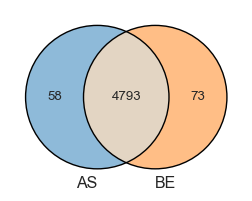

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
scplt.plot_venn(
    ax, pdata, classes="cellline",
    set_colors=["#1f77b4", "#ff7f0e"]
)

In [7]:
scutils.get_classlist(pdata.prot, classes="cellline")

['AS', 'BE']
Categories (2, object): ['AS', 'BE']

Classes: cellline, Values: AS
Filter query: ((adata.obs['cellline'] == 'AS'))
Classes: cellline, Values: BE
Filter query: ((adata.obs['cellline'] == 'BE'))


<Axes: title={'center': 'Coefficient of Variation (CV) by Class'}, xlabel='Class', ylabel='CV'>

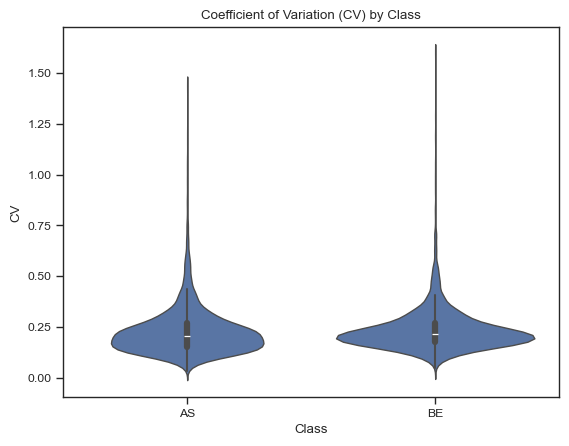

In [3]:
fig, ax = plt.subplots()

scplt.plot_cv(ax, pdata, classes="cellline")

<Axes: xlabel='cellline', ylabel='protein_count'>

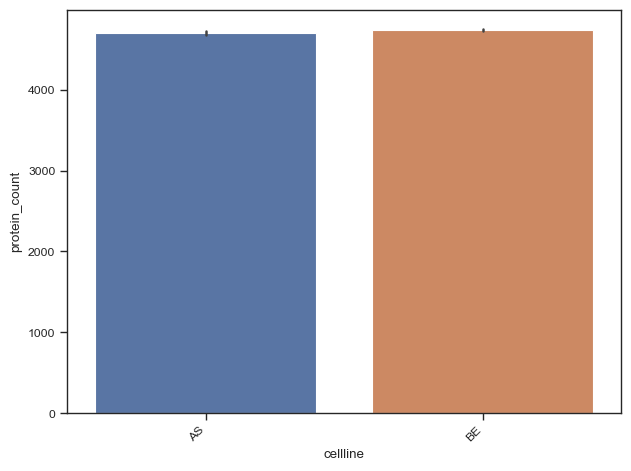

In [7]:
fig, ax = plt.subplots()

scplt.plot_summary(ax, pdata, classes="cellline")

In [3]:
scutils.convert_identifiers(["P40925"], "accession", "gene", return_type="dict")

🔍 [SEARCH] Converting from 'accession' to ['gene'] for 1 identifiers...
     ℹ️ No pdata provided — querying UniProt for all target fields.
     🌐 [API] Querying UniProt for batch 1/1 (1 proteins) [fields: accession, gene_primary]
     ✅ Retrieved UniProt metadata for 1 entries.
     ✅ 1/1 identifiers successfully converted (0 local, 1 via UniProt).


{'P40925': {'gene': 'MDH1'}}

In [4]:
scutils.convert_identifiers(["P40925", "P55072"], "accession", ["gene", "string", "organism_id"], return_type="dict")

🔍 [SEARCH] Converting from 'accession' to ['gene', 'string', 'organism_id'] for 2 identifiers...
     ℹ️ No pdata provided — querying UniProt for all target fields.
     🌐 [API] Querying UniProt for batch 1/1 (2 proteins) [fields: accession, xref_string, gene_primary, organism_id]
     ✅ Retrieved UniProt metadata for 2 entries.
     ✅ 2/2 identifiers successfully converted (0 local, 2 via UniProt).


{'P40925': {'gene': 'MDH1', 'string': nan, 'organism_id': 9606},
 'P55072': {'gene': 'VCP',
  'string': '9606.ENSP00000351777',
  'organism_id': 9606}}

In [5]:
scutils.convert_identifiers(["P40925", "P55072", "P04637"], "accession", ["gene", "string", "organism_id"], return_type="df")

🔍 [SEARCH] Converting from 'accession' to ['gene', 'string', 'organism_id'] for 3 identifiers...
     ℹ️ No pdata provided — querying UniProt for all target fields.
     🌐 [API] Querying UniProt for batch 1/1 (3 proteins) [fields: accession, xref_string, gene_primary, organism_id]
     ✅ Retrieved UniProt metadata for 3 entries.
     ✅ 3/3 identifiers successfully converted (0 local, 3 via UniProt).


,accession,gene,string,organism_id
0,P40925,MDH1,NaN,9606
1,P55072,VCP,9606.ENSP00000351777,9606
2,P04637,TP53,9606.ENSP00000269305,9606


In [8]:
scutils.convert_identifiers(["P40925", "P55072", "P04637"], "accession", ["gene"], return_type="df", pdata=pdata)


🔍 [SEARCH] Converting from 'accession' to ['gene'] for 3 identifiers...
     ℹ️ Using cached mapping from pdata (no UniProt queries).
     ✅ 3/3 identifiers successfully converted (3 local, 0 via UniProt).


,accession,gene
0,P40925,MDH1
1,P55072,VCP
2,P04637,TP53


In [10]:
scutils.convert_identifiers(["MDH1", "VCP", "TP53"], "gene", ["accession", "string", "organism_id"], return_type="df", pdata=pdata)


🔍 [SEARCH] Converting from 'gene' to ['accession', 'string', 'organism_id'] for 3 identifiers...
     ℹ️ Using cached mapping for gene/accession; UniProt lookup required for: string, organism_id.
     🌐 [API] Querying UniProt for batch 1/1 (3 proteins) [fields: accession, xref_string, organism_id, gene_primary]
     ✅ Retrieved UniProt metadata for 3 entries.
     ✅ 3/3 identifiers successfully converted (0 local, 3 via UniProt).


,gene,accession,string,organism_id
0,MDH1,P40925,NaN,9606
1,VCP,P55072,9606.ENSP00000351777,9606
2,TP53,P04637,9606.ENSP00000269305,9606


In [7]:
scutils.convert_identifiers(["P40925", "P55072", "P04637"], "accession", ["gene", "string", "organism_id"], return_type="df", pdata=pdata)


🔍 [SEARCH] Converting from 'accession' to ['gene', 'string', 'organism_id'] for 3 identifiers...
     ℹ️ Using cached mapping for gene/accession; UniProt lookup required for: string, organism_id.
     🌐 [API] Querying UniProt for batch 1/1 (3 proteins) [fields: accession, xref_string, gene_primary, organism_id]
     ✅ Retrieved UniProt metadata for 3 entries.
     ✅ 3/3 identifiers successfully converted (0 local, 3 via UniProt).


,accession,gene,string,organism_id
0,P40925,MDH1,NaN,9606
1,P55072,VCP,9606.ENSP00000351777,9606
2,P04637,TP53,9606.ENSP00000269305,9606
